# Tutorial 3. Pseudo Data

In [1]:
import numpy as NP
import matplotlib.pylab as PLT

## 1. Make PDF kit with class 

In [2]:
#class 

In [3]:
def linear2(x, a, b, c):
    return a*x**2 + b*x + c

def linear3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def exponential(x, a, b, c):
    return a*NP.exp(b*x) + c

def exponential_plateau(x, a, b, c):
    return a*(1 - NP.exp(b*x)) + c

def gaussian(x, a, mean, sigma, c):
    #return a*NP.exp(-1*((x - mean)**2/(2*sigma**2)))/(2*NP.pi*sigma**2) + c
    return a * NP.exp( - ((x - mean) / sigma) ** 2) + c

def lognormal(x, a, mean, sigma, c):
    return a*NP.exp(-0.5*((NP.log(x)-mean)/sigma)**2)/x/(sigma*NP.sqrt(2*NP.pi)) + c

## 3. Generate pseudo data with Monte Carlo method
The noisy signal distriubtion is combined by decay exponential distribution and gaussian distribution.

### 3.1. Make noisy signal distribution

In [4]:
def noisy_signal(x, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c):
    return exponential(x, n_a, n_b, n_c) + gaussian(x, s_a, s_mean, s_sigma, s_c)

In [5]:
xs = NP.linspace(0,20,100)
# gaussian signal parameters
s_a = 0.5
s_mean = 10 
s_sigma = 1.5
s_c = 0
# exponential noise parameters
n_a = 2 
n_b = -0.1 
n_c = 0
# noisy signal
ys = noisy_signal(xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c )

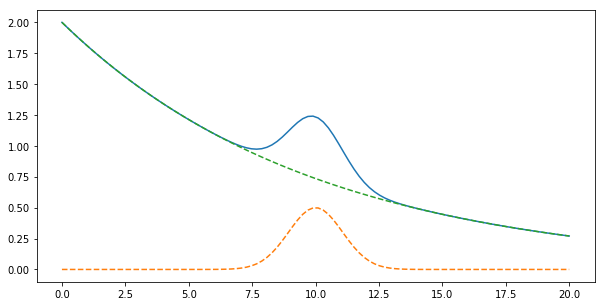

In [6]:
PLT.figure(figsize=[10,5])
PLT.plot(xs, ys)
PLT.plot(xs, gaussian(xs, s_a, s_mean, s_sigma, s_c), '--')
PLT.plot(xs, exponential(xs, n_a, n_b, n_c ), '--')

### 3.2. Generate psuedo data with random function

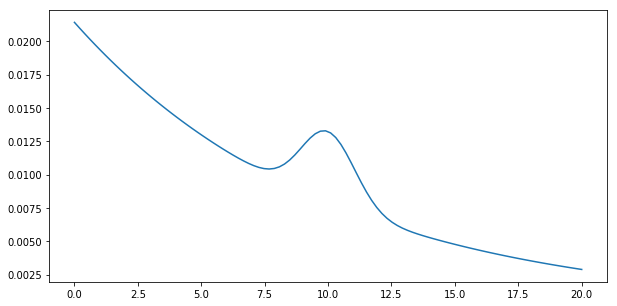

In [7]:
# Normalize distribution to PDF
pdf = ys / ys.sum()
# Draw
PLT.figure(figsize=[10,5])
PLT.plot(xs, pdf)

In [8]:
# generate psuedo data with random function
n_data = 1000
NP.random.seed = 0 
data = NP.random.choice(xs, n_data, p=pdf)
print('Data size : ', len(data))

Data size :  1000


(array([41., 42., 35., 38., 38., 40., 29., 41., 22., 25., 26., 27., 22.,
        27., 22., 25., 24., 17., 16., 27., 24., 18., 19., 27., 33., 30.,
        19., 18., 17., 18., 13., 11., 17., 10.,  8.,  6., 15., 17.,  9.,
         7.,  7.,  7.,  5.,  6.,  6.,  8., 12.,  9., 11.,  9.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <a list of 50 Patch objects>)

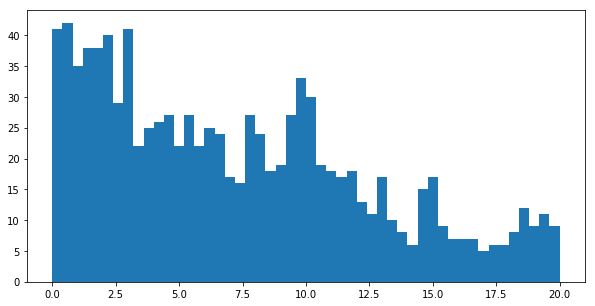

In [9]:
# Make histogram
PLT.figure(figsize=[10,5])
PLT.hist(data, bins=50, range=[0,20])

In [10]:
# generate psuedo data with random function and different size of data
data = []
NP.random.seed = 0 
for n_data in [100, 500, 1000, 5000, 10000, 50000]:
    data.append(NP.random.choice(xs, n_data, p=pdf))

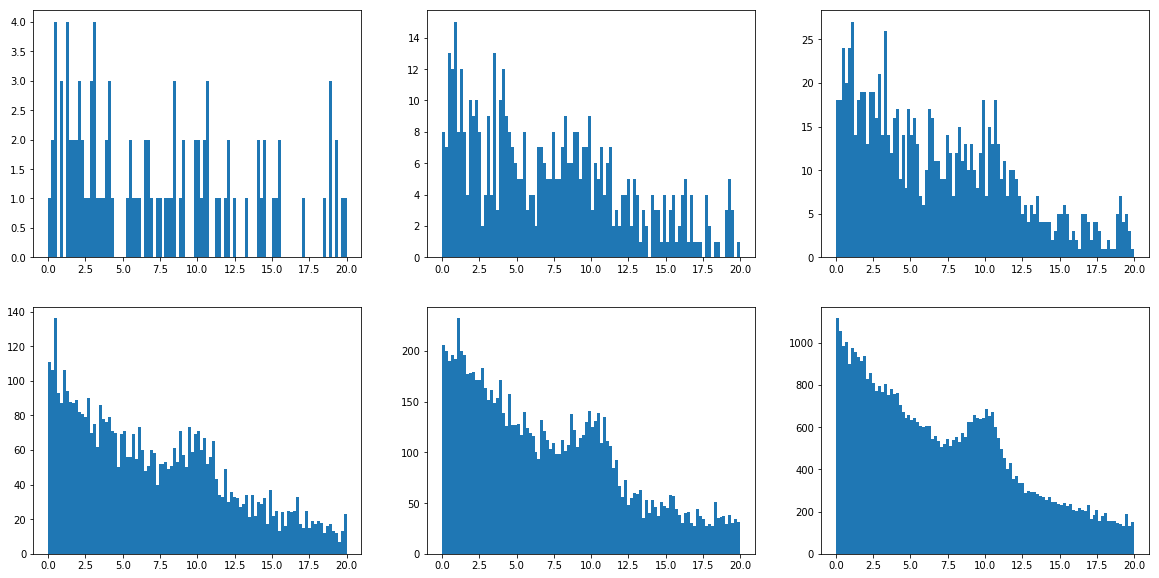

In [11]:
fig, axes = PLT.subplots(nrows=2, ncols=3, figsize=[20,10])
# 2nd order linear
y1, x1, img = axes[0][0].hist(data[0], bins=100, range=[0,20])
y2, x2, img = axes[0][1].hist(data[1], bins=100, range=[0,20])
y3, x3, img = axes[0][2].hist(data[2], bins=100, range=[0,20])
y4, x4, img = axes[1][0].hist(data[3], bins=100, range=[0,20])
y5, x5, img = axes[1][1].hist(data[4], bins=100, range=[0,20])
y6, x6, img = axes[1][2].hist(data[5], bins=100, range=[0,20])

In [12]:
from scipy.optimize import curve_fit

In [13]:
p, v = curve_fit(noisy_signal, x6[:-1], y6, p0=[s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c])

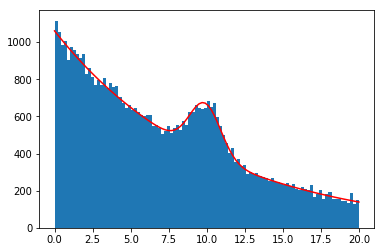

In [14]:
PLT.hist(data[5], bins=100, range=[0,20])
PLT.plot(xs, noisy_signal(xs, p[0], p[1], p[2], p[3], p[4], p[5], p[6] ), 'r-')

In [15]:
s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c

(0.5, 10, 1.5, 0, 2, -0.1, 0)

In [16]:
p[0], p[1], p[2], p[3], p[4], p[5], p[6]

(273.8117660125009,
 9.897757298468845,
 1.4539604215595894,
 -1758.895245716051,
 1078.753706230286,
 -0.09626146256476777,
 1740.3858906320102)